In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10, mnist
from keras.layers import (BatchNormalization, Conv2D, Conv2DTranspose, Dense,
                          Dropout, Flatten, Input, Reshape, UpSampling2D,
                          ZeroPadding2D)
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
#from keras.optimizers import Adamifar10
from keras.optimizers import Adam
from sklearn.utils import shuffle

%matplotlib inline

Using TensorFlow backend.


In [0]:
# Consistent results
np.random.seed(10)

# The dimension of z
noise_dim = 100

batch_size = 16
steps_per_epoch = 3750 # 60000 / 16
epochs = 21

save_path = 'fcgan-images'

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [0]:
# Create path for saving images
if save_path != None and not os.path.isdir(save_path):
    os.mkdir(save_path)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/A_ZHandwrittenData.csv')

In [0]:
dataset.rename(columns={'0':'label'}, inplace=True)

In [0]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

In [0]:
r_dataset = dataset[dataset['label']=='R'].copy()

In [0]:
# Splite data the X - Our data , and y - the prdict label
X = r_dataset.drop('label',axis = 1).astype(np.float32)
y = r_dataset['label']

In [0]:
XX = X.applymap(lambda l: 255-l).copy()

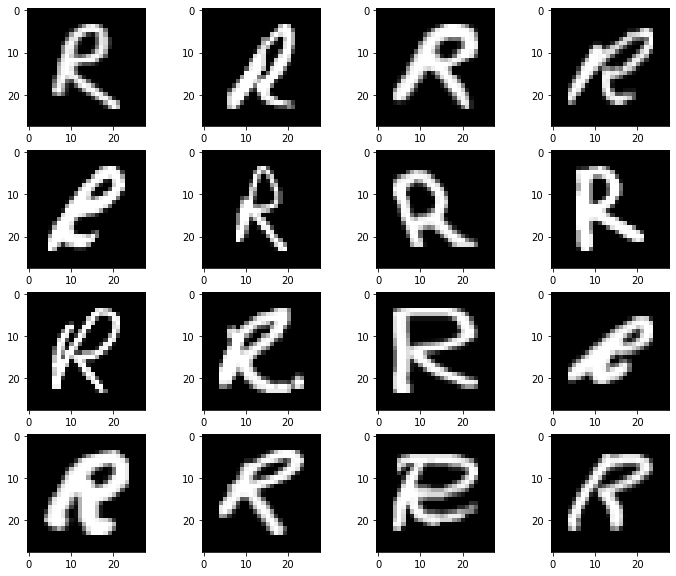

In [13]:
X_shuffle = shuffle(XX)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [0]:
x_train = XX.iloc[:7000, :]
y_train = y.iloc[:7000]
x_test = XX.iloc[7000:, :]
y_test = y.iloc[7000:]

In [0]:
import glob
import cv2


image_list = []
images=glob.glob("/content/drive/My Drive/Colab Notebooks/datasets/Black Sword/*.jpg")
for image in images:
  img = cv2.imread(image,0)
  #img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  #print('Original Dimensions : ',img.shape)
  width = 28
  height = 28
  dim = (width, height)
  
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  #print('Resized Dimensions : ',resized.shape)
  image_list.append(np.array(resized))
 

    # img = Image.open(image)
    # img1 = resizeimage.resize_cover(img, [28, 28])
    # #img1 = img.thumbnail(size, Image.ANTIALIAS)
    # #img1 = img.resize((28, 28))
    # #img1.thumbnail((25, 25))
    # #img1 = misc.imresize(img, (28, 28))
    # #dataset_train = dataset_train.values.reshape(-1, 28, 28, 1) 
    # #img1 = img.resize(28,28)
    # image_list.append(np.array(img1))

In [16]:
len(image_list)

131

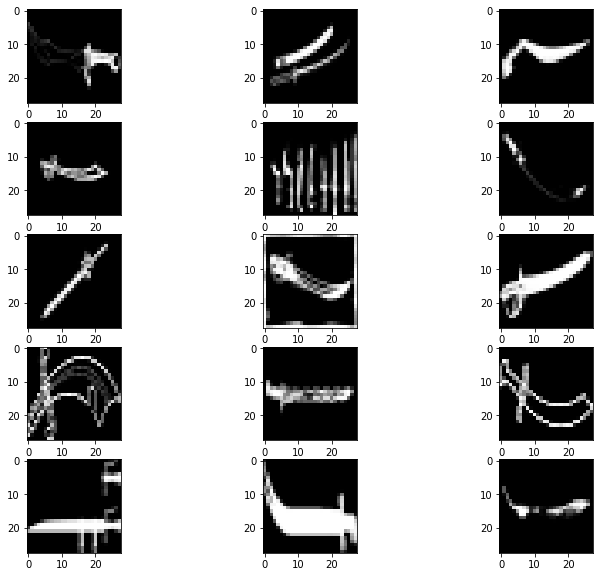

In [17]:
plt.figure(figsize = (12,10))
row, colums = 3, 5
for i in range(15):  
    plt.subplot(colums, row, i+1)
    plt.imshow(image_list[i],interpolation='nearest', cmap='Greys')
plt.show()

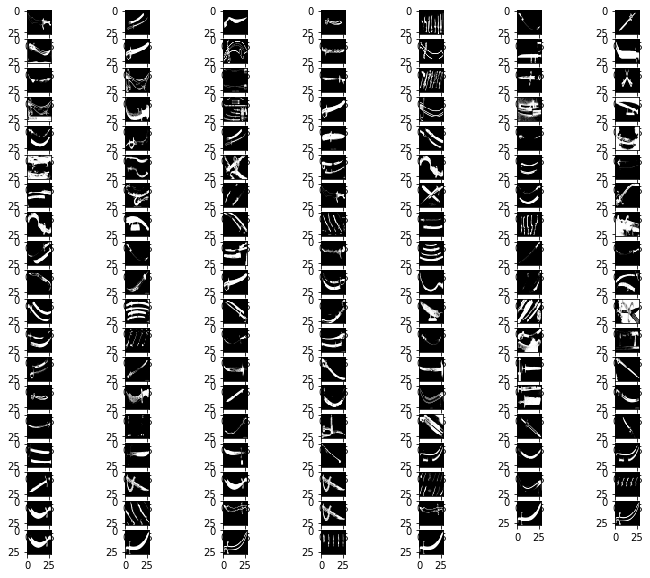

In [18]:
plt.figure(figsize = (12,10))
row, colums = 7, 19
for i in range(131):  
    plt.subplot(colums, row, i+1)
    plt.imshow(image_list[i],interpolation='nearest', cmap='Greys')
plt.show()

In [0]:
#list(dataset.columns[1:])

In [20]:
len(image_list[0][0])

28

In [0]:
# df_sword = pd.DataFrame(np.reshape(image_list, (131, 784)), columns= list(dataset.columns[1:]))

In [0]:
# XX_sword = df_sword.iloc[113:131, :].applymap(lambda l: 255-l).copy()

In [0]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

XX_sword = np.reshape(image_list, (131, 784))
# reshape to be [samples][width][height][channels]
XX_sword = XX_sword.reshape((XX_sword.shape[0], 28, 28, 1)).astype('float32')

In [24]:
XX_sword.shape

(131, 28, 28, 1)

In [0]:
y_sword = ['S']*131

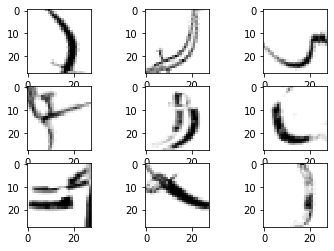

In [26]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(XX_sword)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(XX_sword, y_sword, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [27]:
x_train.shape 

(7000, 784)

In [0]:
df_sword = pd.DataFrame(np.reshape(image_list, (131, 784)), columns= list(dataset.columns[1:]))

In [0]:
x_final = pd.concat([x_train.iloc[:4000, :], df_sword], axis=0)

In [32]:
x_final.shape

(4131, 784)

In [0]:

# Normalize to between -1 and 1
x_final = (x_final.astype(np.float32) - 127.5) / 127.5

x_final = x_final.values.reshape(-1, img_rows*img_cols*channels)

In [0]:
#x_final

In [0]:
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [0]:
def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [37]:
discriminator = create_descriminator()
generator = create_generator()

# Make the discriminator untrainable when we are training the generator.  This doesn't effect the discriminator by itself
discriminator.trainable = False

# Link the two models to create the GAN
gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Display images, and save them if the epoch number is specified
def show_images(noise, epoch=None):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    
    if epoch != None and save_path != None:
        plt.savefig(f'{save_path}/gan-images_epoch-{epoch}.png')
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Epoch: 0 	 Discriminator Loss: 0.5317306518554688 		 Generator Loss: 1.9538341760635376


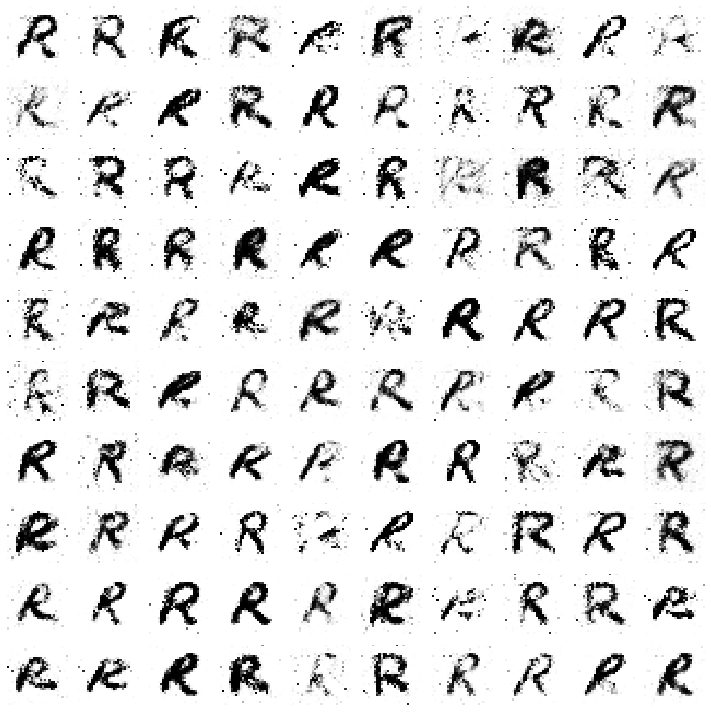

Epoch: 1 	 Discriminator Loss: 0.59464430809021 		 Generator Loss: 1.4239904880523682


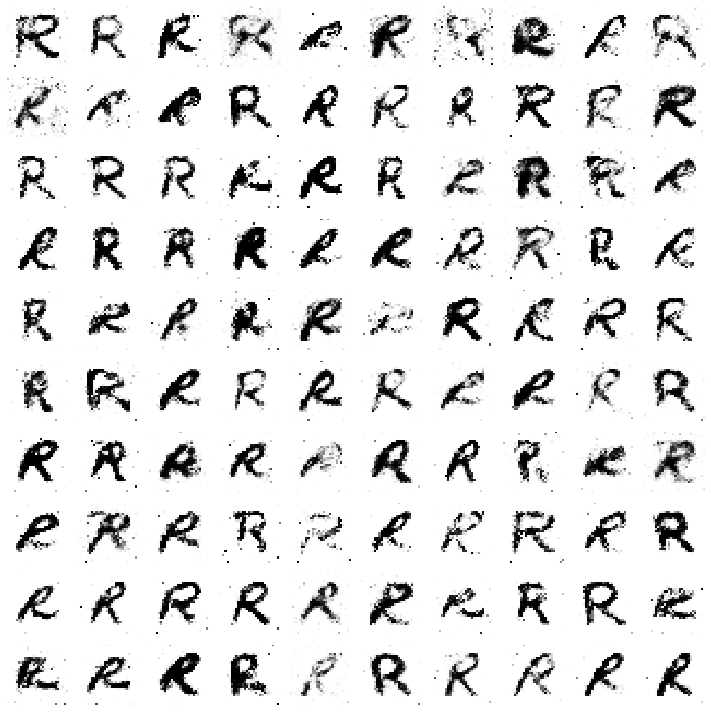

Epoch: 2 	 Discriminator Loss: 0.6019905805587769 		 Generator Loss: 1.3603594303131104


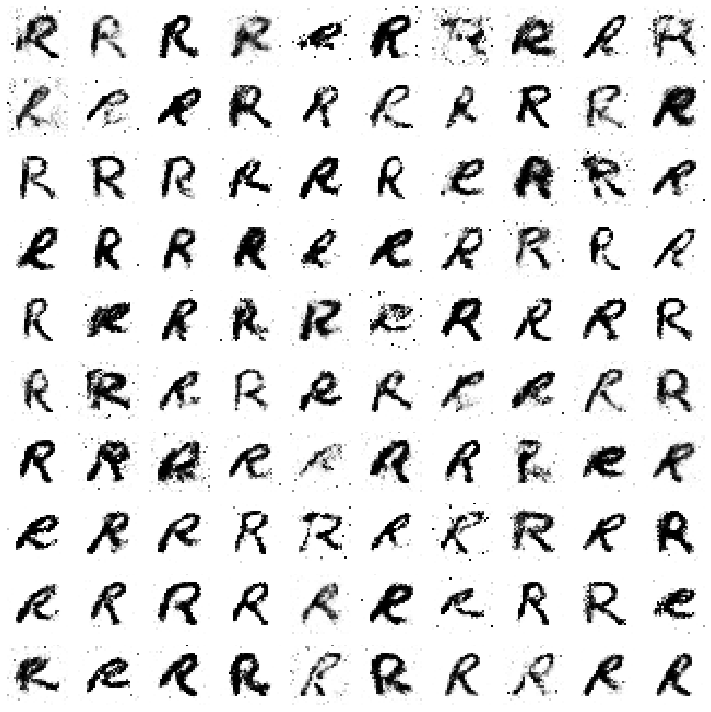

Epoch: 3 	 Discriminator Loss: 0.4940643310546875 		 Generator Loss: 1.8991203308105469


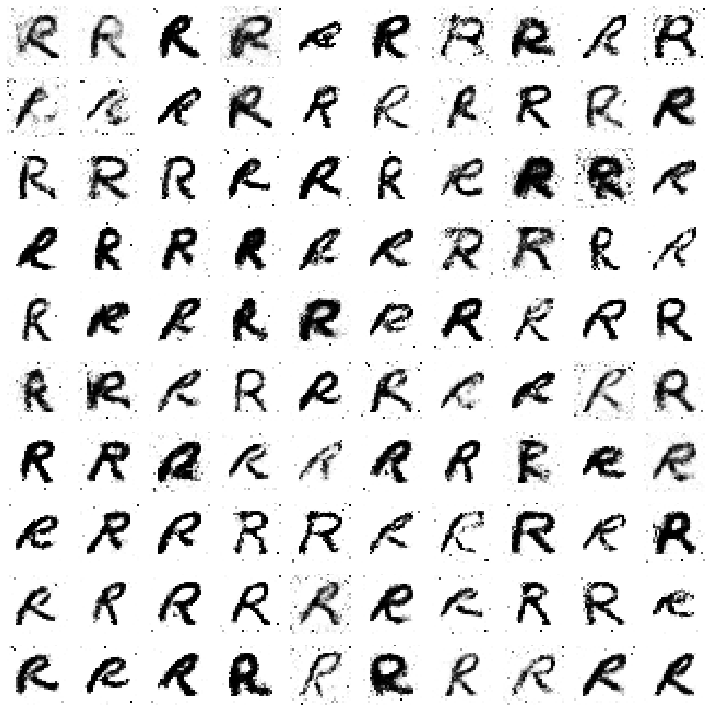

Epoch: 4 	 Discriminator Loss: 0.5460487604141235 		 Generator Loss: 1.7510292530059814


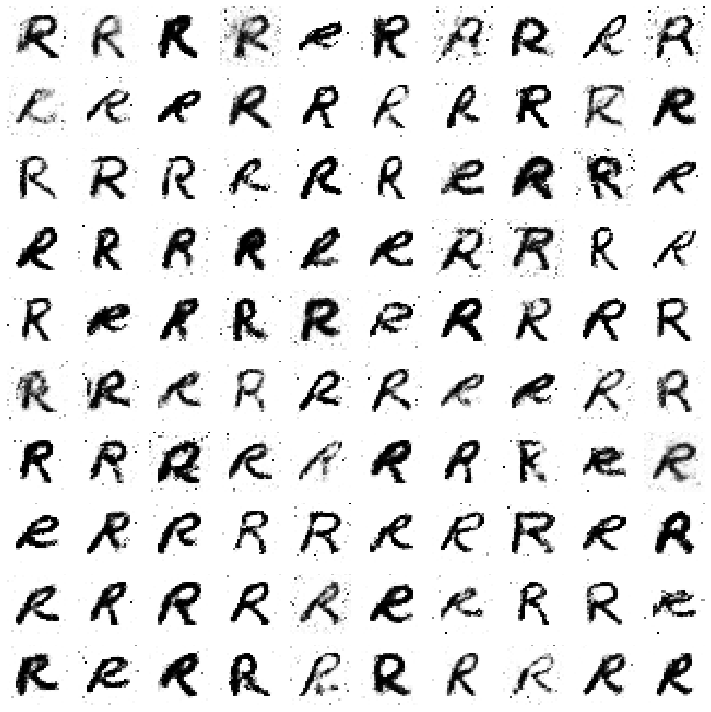

Epoch: 5 	 Discriminator Loss: 0.40043699741363525 		 Generator Loss: 2.324331521987915


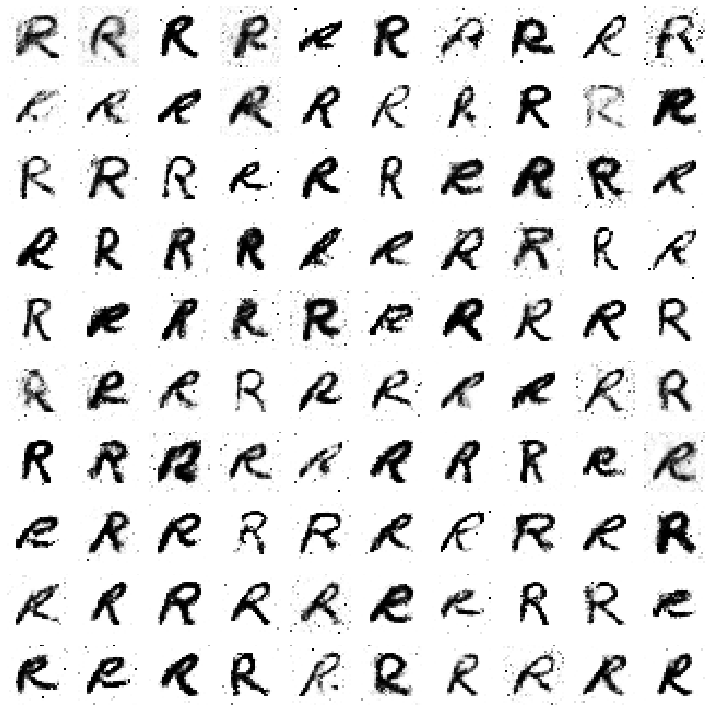

Epoch: 6 	 Discriminator Loss: 0.29386770725250244 		 Generator Loss: 3.025728702545166


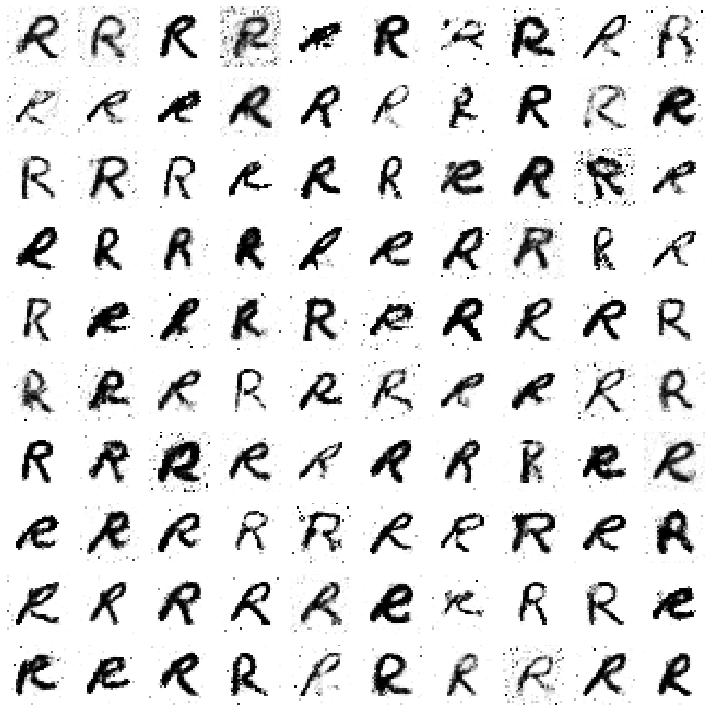

Epoch: 7 	 Discriminator Loss: 0.33508816361427307 		 Generator Loss: 2.949398994445801


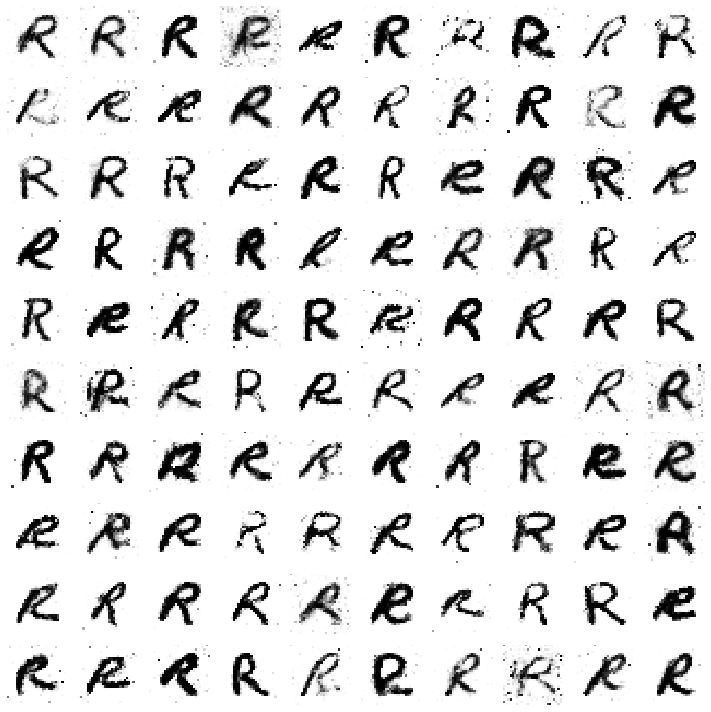

Epoch: 8 	 Discriminator Loss: 0.3119247257709503 		 Generator Loss: 3.2195239067077637


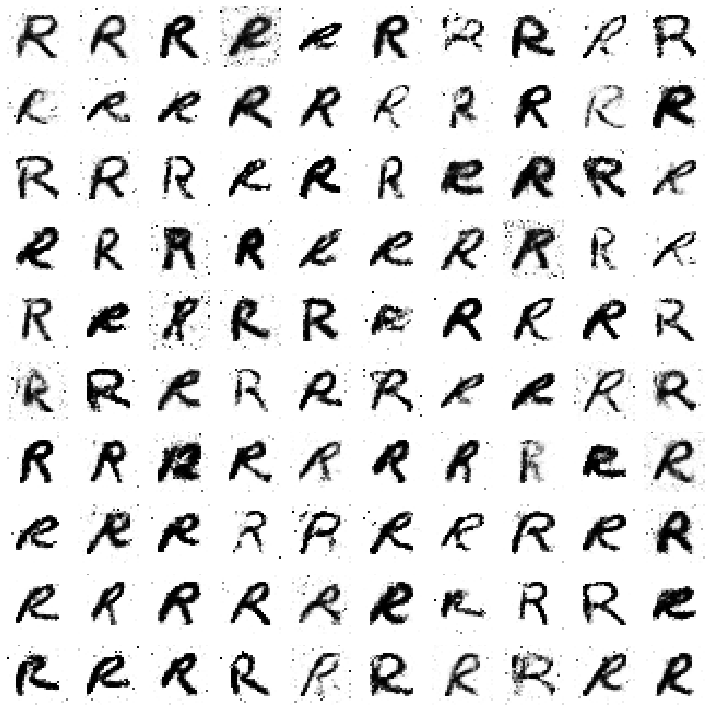

Epoch: 9 	 Discriminator Loss: 0.27501344680786133 		 Generator Loss: 3.6036293506622314


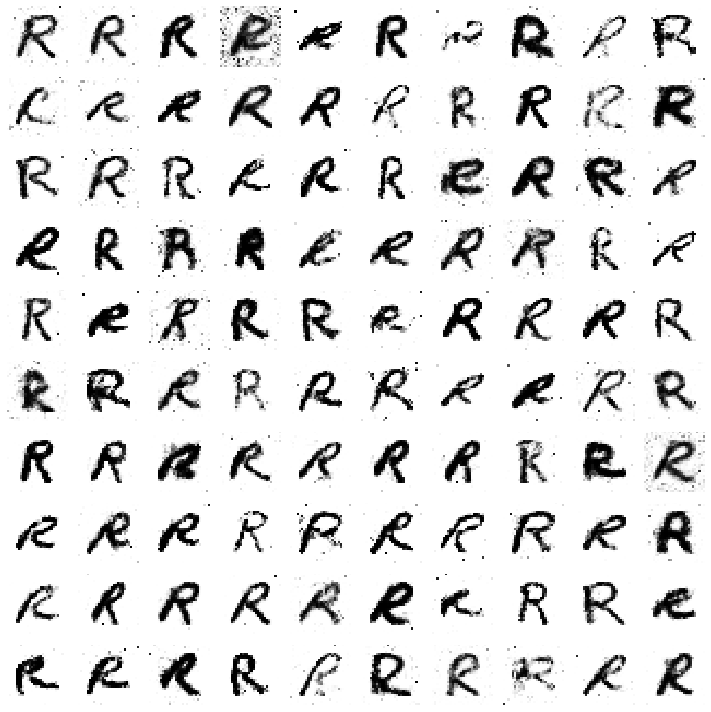

Epoch: 10 	 Discriminator Loss: 0.3012981116771698 		 Generator Loss: 4.092716693878174


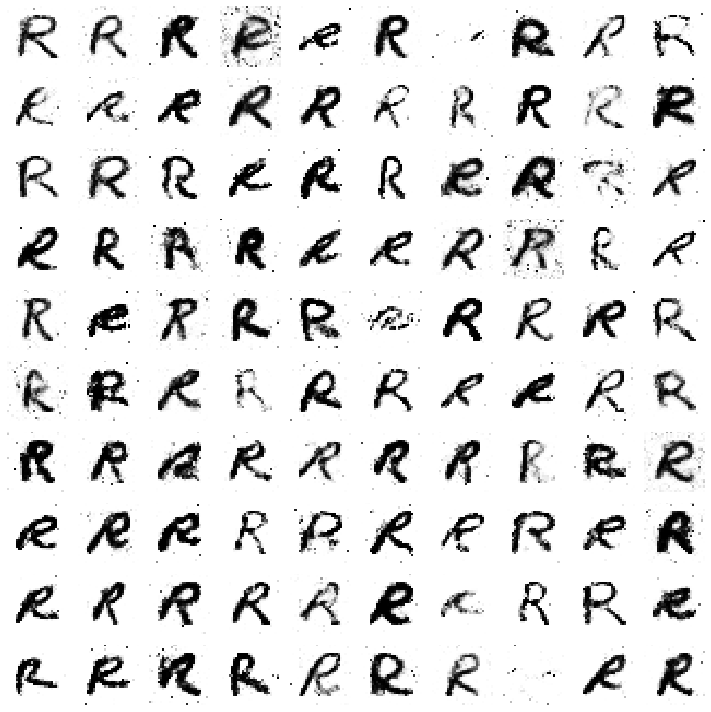

Epoch: 11 	 Discriminator Loss: 0.25619810819625854 		 Generator Loss: 3.3413679599761963


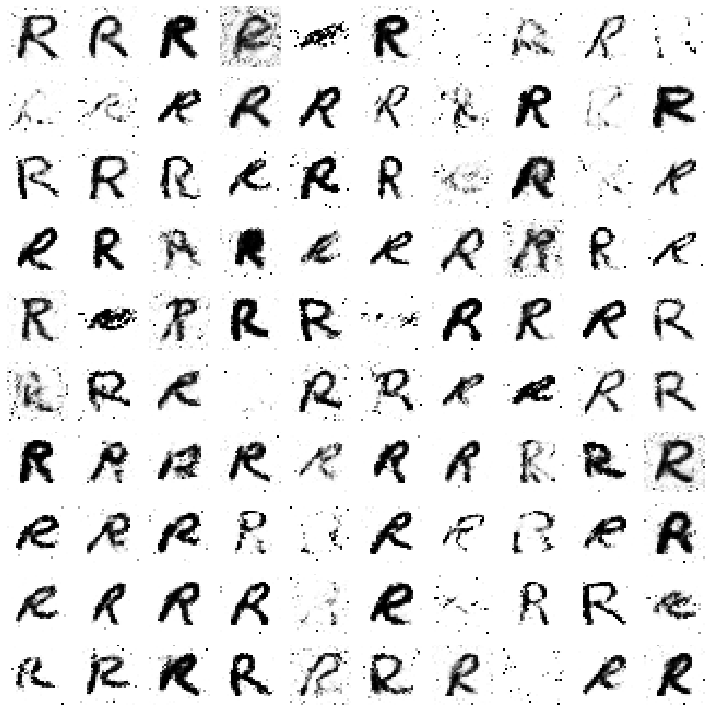

Epoch: 12 	 Discriminator Loss: 0.22657933831214905 		 Generator Loss: 4.737462997436523


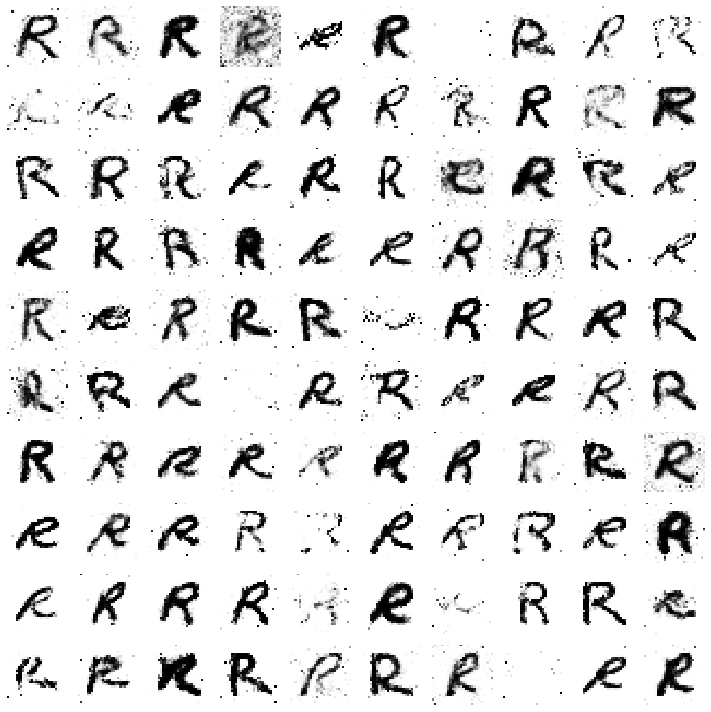

In [0]:
# Constant noise for viewing how the GAN progresses
static_noise = np.random.normal(0, 1, size=(100, noise_dim))

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_final[np.random.randint(0, x_final.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    #if epoch % 10 == 0:
    show_images(static_noise, epoch)

In [0]:
# Turn the training process into a GIF
from PIL import Image, ImageDraw

frames = []
for image in os.listdir(save_path):
    frames.append(Image.open(save_path + '/' + image))
frames[0].save('gan_training_sword2.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

discriminator.save('fcdiscriminator_sword2.hdf5')
generator.save('fcgenerator_sword2.hdf5')

In [0]:
from google.colab import files
files.download('gan_training_sword2.gif')